In [31]:
from sklearn import datasets
import numpy as np

In [32]:
iris = datasets.load_iris()
x = iris.data[:, [2,3]]
y = iris.target

In [33]:
from sklearn.cross_validation import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [37]:
from sklearn.linear_model import Perceptron

In [38]:
ppn = Perceptron(n_iter = 40, eta0 = 0.1, random_state = 0)
ppn.fit(x_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [39]:
y_pred = ppn.predict(x_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4


In [40]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

def plot_decision_regions(X, Y, classifier, test_idx = None, 
                          resolution = 0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all samples
    X_test, Y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(Y)):
        plt.scatter(x = X[y == cl, 0], y  = X[y == cl, 1],
                   alpha = 0.8, c = cmap(idx), 
                    marker = markers[idx], label = cl)
        
    # highlight test samples
    if test_idx:
        X_test, Y_test = X[test_idx, :], Y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c = '',
                   s = 55, label = 'test set')

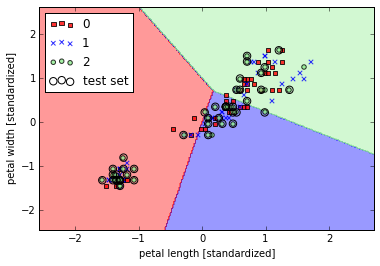

In [41]:
X_combined_std = np.vstack((x_train_std, x_test_std))
Y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X = X_combined_std,
                     Y = Y_combined,
                     classifier = ppn, 
                     test_idx = range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')

In [42]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

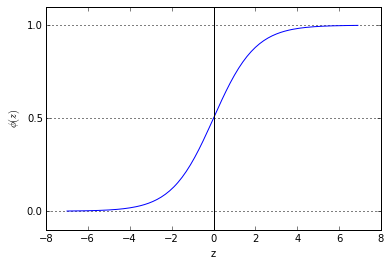

In [45]:
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color = 'k')
plt.axhspan(0.0, 1.0, facecolor = '1.0', alpha = 1.0, ls = 'dotted')
plt.axhline(y = 0.5, ls = 'dotted', color = 'k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

In [46]:
from sklearn.linear_model import LogisticRegression

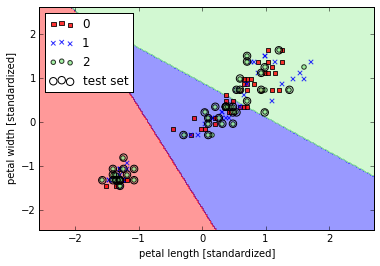

In [49]:
lr = LogisticRegression(C = 1000.0, random_state=0)
lr.fit(x_train_std, y_train)
plot_decision_regions(X_combined_std, Y_combined, classifier = lr, test_idx = range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')

# SVMs!


In [50]:
from sklearn.svm import SVC

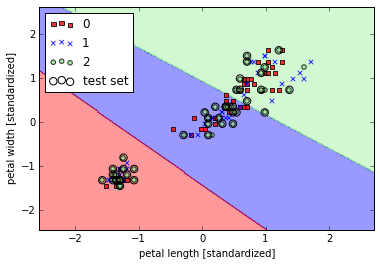

In [52]:
svm = SVC(kernel= 'linear', C = 1.0, random_state=0)
svm.fit(x_train_std, y_train)
plot_decision_regions(X_combined_std, Y_combined, classifier= svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')


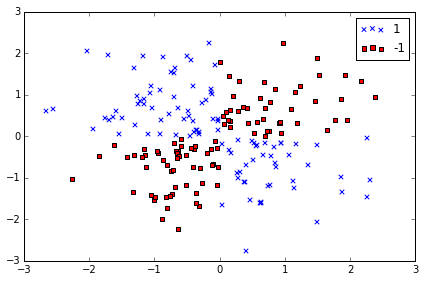

In [66]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()

/Users/WRShoemaker/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:27: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 200 but corresponding boolean dimension is 150


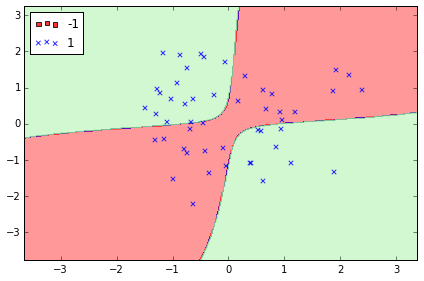

In [67]:
svm = SVC(kernel='rbf', random_state=0, gamma = 0.1, C = 10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier = svm)
plt.legend(loc = 'upper left')
plt.tight_layout()

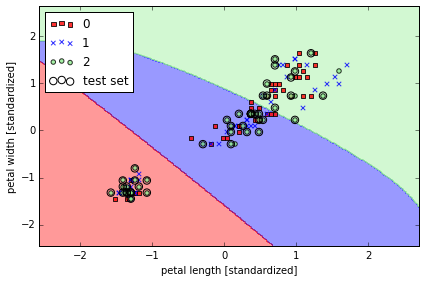

In [70]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(x_train_std, y_train)

plot_decision_regions(X_combined_std, Y_combined, 
                      classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

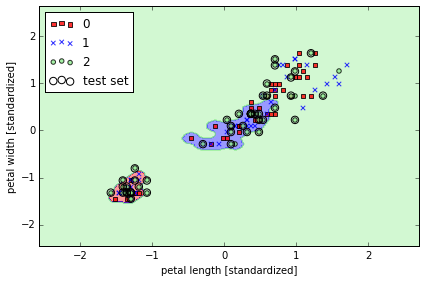

In [71]:
svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)
svm.fit(x_train_std, y_train)

plot_decision_regions(X_combined_std, Y_combined, 
                      classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

# Decision Trees

In [72]:
from sklearn.tree import DecisionTreeClassifier

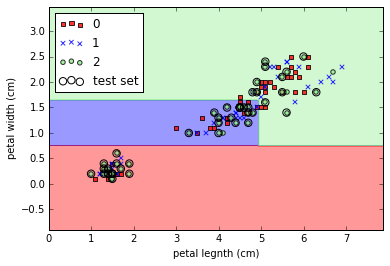

In [73]:
tree = DecisionTreeClassifier(criterion = 'entropy', 
                             max_depth = 3, random_state = 0)
tree.fit(x_train, y_train)
X_combined = np.vstack((x_train, x_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined,
                     classifier = tree, test_idx = range(105,150))
plt.xlabel('petal legnth (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc = 'upper left')

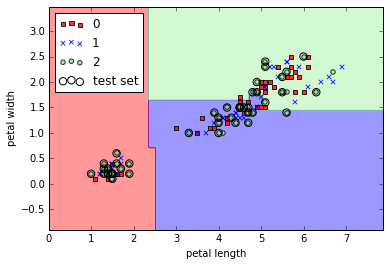

In [75]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion = 'entropy',
                               n_estimators = 10,
                               random_state = 1, n_jobs =2)
forest.fit(x_train, y_train)
plot_decision_regions(X_combined, y_combined,
                     classifier = forest, test_idx = range(105, 150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc = 'upper left')